MobilenetV2

In [1]:
# import the required packages 
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf
import cv2

In [4]:
#load the dataset
dataset = r'C:\Users\Ranjith ch\Desktop\ML Main Project\brain_tumor_dataset'

In [5]:
#getting the image path
image_path=list(paths.list_images(dataset))

In [6]:
image_path

['C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\1 no.jpeg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\10 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\11 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\12 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\13 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\15 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\17 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\18 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\19 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\2 no.jpeg',
 'C:\\Users\\Ranjith ch\\Desktop\\ML Main Project\\brain_tumor_dataset\\no\\20 no.jpg',
 'C:\\Users\\Ranjith ch\\Desktop

In [7]:
#splitting the data and the labels from the dataset 
data=[]
labels=[]

for i in image_path:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [8]:
data

[array([[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        ...,
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],
 
        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
  

In [9]:
labels

['no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 '

In [10]:
# convert the data nd the labels into array
data=np.array(data,dtype='float32')
labels = np.array(labels)

In [11]:
data.shape

(253, 224, 224, 3)

In [12]:
labels.shape

(253,)

In [13]:
#convert the labels into binary format[0, 1]
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels,2)

In [14]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [15]:
labels.shape

(253, 2)

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [17]:
train_generator = train_datagen.flow_from_directory(
        dataset,  
        target_size=(224, 224),  
        batch_size=3) 

Found 253 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [19]:
#split the test and train data
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=3)

In [20]:
train_X.shape

(202, 224, 224, 3)

In [21]:
train_Y.shape

(202, 2)

In [22]:
test_Y.shape

(51, 2)

In [23]:
#load the basemodel we can use mobilenetv2.inception etc..
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [24]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [25]:
#add the layers above the basemodel
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)

In [26]:
# making the basemodel training layers to false 
for layer in baseModel.layers:
    layer.trainable=False

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [28]:
lr=0.001   #learning_rate
Epochs=10 # Number of epochs 
BS=12   #batch_size

In [29]:
#complie the model using the adam optimzer and with the required loss ,mertices 
opt=Adam(learning_rate=lr,decay=lr/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto", verbose=1)

In [30]:
# fit the model to train the data 
A=model.fit(train_X,train_Y,batch_size=BS,validation_data=(test_X,test_Y),epochs=Epochs,callbacks=[checkpoint, earlystop])

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 0.7100 - accuracy: 0.6386
Epoch 1: val_accuracy improved from -inf to 0.72549, saving model to model1.h5
17/17 [==============================] - 7s 279ms/step - loss: 0.7100 - accuracy: 0.6386 - val_loss: 0.4685 - val_accuracy: 0.7255
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.4113 - accuracy: 0.8218
Epoch 2: val_accuracy improved from 0.72549 to 0.88235, saving model to model1.h5
17/17 [==============================] - 4s 239ms/step - loss: 0.4113 - accuracy: 0.8218 - val_loss: 0.3564 - val_accuracy: 0.8824
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8713
Epoch 3: val_accuracy did not improve from 0.88235
17/17 [==============================] - 4s 228ms/step - loss: 0.3214 - accuracy: 0.8713 - val_loss: 0.3452 - val_accuracy: 0.8235
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.2507 - accuracy: 0.9158
Epoch 4: val_accura

In [31]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

          no       0.90      0.95      0.93        20
         yes       0.97      0.94      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [32]:
# obtain the accuracy of the predicted model on the testing data
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict)

0.9411764705882353

<AxesSubplot:>

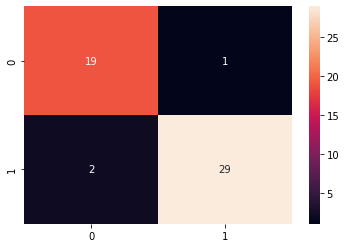

In [33]:
# get the confusion matrix and plot using seaborn 
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_Y.argmax(axis=1), predict)
sns.heatmap(cm,annot=True)

In [34]:
# get the sensitivity and specificity
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 2 29]]
acc: 0.9412
sensitivity: 0.9500
specificity: 0.9355


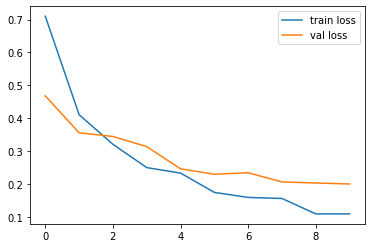

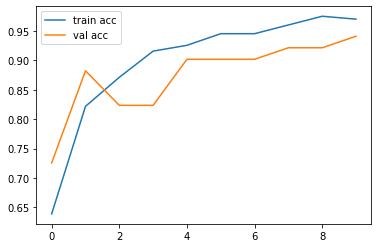

In [35]:
#plot the loss
plt.plot(A.history['loss'], label='train loss')
plt.plot(A.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(A.history['accuracy'], label='train acc')
plt.plot(A.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

VGG16

In [38]:
# import the required packages 
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import VGG16,InceptionV3,ResNet50V2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
import tensorflow as tf
import cv2

In [41]:
#load the dataset
dataset = r'C:\Users\Ranjith ch\Desktop\ML Main Project\brain_tumor_dataset'

In [42]:
#getting the image path
image_path=list(paths.list_images(dataset))

In [43]:
#splitting the data and the labels from the dataset 
data=[]
labels=[]

for i in image_path:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [44]:
# convert the data nd the labels into array
data=np.array(data,dtype='float32')
labels = np.array(labels)

In [45]:
#convert the labels into binary format[0, 1]
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels,2)

In [46]:
#split the test and train data
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=3)

In [47]:
#load the basemodel "VGG16" we can use mobilenetv2.inception etc..
baseModel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [48]:
#add the layers above the basemodel
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model1=Model(inputs=baseModel.input,outputs=headModel)

In [49]:
# making the basemodel training layers to false 
for layer in baseModel.layers:
    layer.trainable=False

In [50]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
lr=0.001   #learning_rate
Epochs=10 # Number of epochs 
BS=12   #batch_size

In [52]:
#complie the model using the adam optimzer and with the required loss ,mertices 
opt=Adam(learning_rate=lr,decay=lr/Epochs)
model1.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
checkpoint = ModelCheckpoint("model1.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto", verbose=1)

In [53]:
# fit the model to train the data 
A=model1.fit(train_X,train_Y,batch_size=BS,validation_data=(test_X,test_Y),epochs=Epochs,callbacks=[checkpoint, earlystop])

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.6089
Epoch 1: val_accuracy improved from -inf to 0.60784, saving model to model.h5
17/17 [==============================] - 28s 2s/step - loss: 0.6943 - accuracy: 0.6089 - val_loss: 0.6284 - val_accuracy: 0.6078
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.6365 - accuracy: 0.6634
Epoch 2: val_accuracy improved from 0.60784 to 0.74510, saving model to model.h5
17/17 [==============================] - 29s 2s/step - loss: 0.6365 - accuracy: 0.6634 - val_loss: 0.5803 - val_accuracy: 0.7451
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.7525
Epoch 3: val_accuracy did not improve from 0.74510
17/17 [==============================] - 29s 2s/step - loss: 0.5762 - accuracy: 0.7525 - val_loss: 0.5435 - val_accuracy: 0.7059
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.5386 - accuracy: 0.7574
Epoch 4: val_accuracy impro

In [54]:
predict1=model1.predict(test_X,batch_size=BS)
predict1=np.argmax(predict1,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict1,target_names=lb.classes_))

              precision    recall  f1-score   support

          no       0.89      0.85      0.87        20
         yes       0.91      0.94      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.89      0.90        51
weighted avg       0.90      0.90      0.90        51



In [55]:
# obtain the accuracy of the predicted model on the testing data
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict1)

0.9019607843137255

<AxesSubplot:>

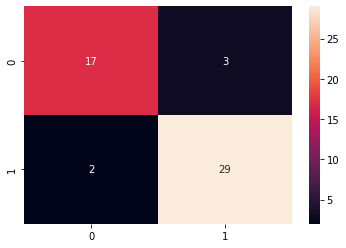

In [56]:
# get the confusion matrix and plot using seaborn 
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1 = confusion_matrix(test_Y.argmax(axis=1), predict1)
sns.heatmap(cm1,annot=True)

In [57]:
# get the sensitivity and specificity
total = sum(sum(cm1))
acc = (cm1[0, 0] + cm1[1, 1]) / total
sensitivity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
specificity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
print(cm1)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[17  3]
 [ 2 29]]
acc: 0.9020
sensitivity: 0.8500
specificity: 0.9355


ResNet50V2 

In [58]:
baseModel=ResNet50V2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [59]:
#add the layers above the basemodel
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model2=Model(inputs=baseModel.input,outputs=headModel)

In [60]:
# making the basemodel training layers to false 
for layer in baseModel.layers:
    layer.trainable=False

In [61]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [62]:
lr=0.001   #learning_rate
Epochs=10 # Number of epochs 
BS=12   #batch_size

In [63]:
#complie the model using the adam optimzer and with the required loss ,mertices 
opt=Adam(learning_rate=lr,decay=lr/Epochs)
model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
checkpoint = ModelCheckpoint("model2.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto", verbose=1)

In [64]:
# fit the model to train the data 
A=model2.fit(train_X,train_Y,batch_size=BS,validation_data=(test_X,test_Y),epochs=Epochs,callbacks=[checkpoint, earlystop])

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 0.7273 - accuracy: 0.6931
Epoch 1: val_accuracy improved from -inf to 0.54902, saving model to model2.h5
17/17 [==============================] - 17s 802ms/step - loss: 0.7273 - accuracy: 0.6931 - val_loss: 1.0436 - val_accuracy: 0.5490
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.8168
Epoch 2: val_accuracy improved from 0.54902 to 0.84314, saving model to model2.h5
17/17 [==============================] - 12s 702ms/step - loss: 0.4529 - accuracy: 0.8168 - val_loss: 0.3541 - val_accuracy: 0.8431
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.3042 - accuracy: 0.9010
Epoch 3: val_accuracy improved from 0.84314 to 0.86275, saving model to model2.h5
17/17 [==============================] - 12s 702ms/step - loss: 0.3042 - accuracy: 0.9010 - val_loss: 0.2881 - val_accuracy: 0.8627
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.2395 - ac

In [65]:
predict2=model2.predict(test_X,batch_size=BS)
predict2=np.argmax(predict2,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict2,target_names=lb.classes_))

              precision    recall  f1-score   support

          no       0.79      0.95      0.86        20
         yes       0.96      0.84      0.90        31

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51



In [66]:
# obtain the accuracy of the predicted model on the testing data
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict2)

0.8823529411764706

<AxesSubplot:>

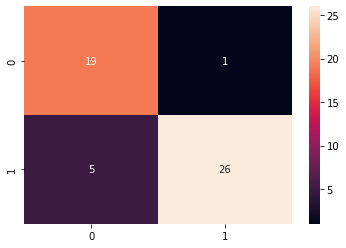

In [67]:
# get the confusion matrix and plot using seaborn 
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2 = confusion_matrix(test_Y.argmax(axis=1), predict2)
sns.heatmap(cm2,annot=True)

In [68]:
# get the sensitivity and specificity
total = sum(sum(cm2))
acc = (cm2[0, 0] + cm2[1, 1]) / total
sensitivity = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])
specificity = cm2[1, 1] / (cm2[1, 0] + cm2[1, 1])
print(cm2)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 5 26]]
acc: 0.8824
sensitivity: 0.9500
specificity: 0.8387


InceptionV3 

In [69]:
baseModel=InceptionV3(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [70]:
#add the layers above the basemodel
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(5,5))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model3=Model(inputs=baseModel.input,outputs=headModel)

In [71]:
# making the basemodel training layers to false 
for layer in baseModel.layers:
    layer.trainable=False

In [72]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [73]:
lr=0.001   #learning_rate
Epochs=10 # Number of epochs 
BS=12   #batch_size

In [74]:
#complie the model using the adam optimzer and with the required loss ,mertices 
opt=Adam(learning_rate=lr,decay=lr/Epochs)
model3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
checkpoint = ModelCheckpoint("model3.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto", verbose=1)

In [75]:
# fit the model to train the data 
A=model3.fit(train_X,train_Y,batch_size=BS,validation_data=(test_X,test_Y),epochs=Epochs,callbacks=[checkpoint, earlystop])

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 0.8423 - accuracy: 0.6287
Epoch 1: val_accuracy improved from -inf to 0.82353, saving model to model3.h5
17/17 [==============================] - 11s 497ms/step - loss: 0.8423 - accuracy: 0.6287 - val_loss: 0.4228 - val_accuracy: 0.8235
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.7376
Epoch 2: val_accuracy improved from 0.82353 to 0.84314, saving model to model3.h5
17/17 [==============================] - 8s 452ms/step - loss: 0.5194 - accuracy: 0.7376 - val_loss: 0.3796 - val_accuracy: 0.8431
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8069
Epoch 3: val_accuracy improved from 0.84314 to 0.88235, saving model to model3.h5
17/17 [==============================] - 7s 449ms/step - loss: 0.4307 - accuracy: 0.8069 - val_loss: 0.3721 - val_accuracy: 0.8824
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.3920 - accu

In [76]:
predict3=model3.predict(test_X,batch_size=BS)
predict3=np.argmax(predict3,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict3,target_names=lb.classes_))

              precision    recall  f1-score   support

          no       0.90      0.95      0.93        20
         yes       0.97      0.94      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [77]:
# obtain the accuracy of the predicted model on the testing data
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict3)

0.9411764705882353



Mobilenet accuracy : 94% ,Mobilenet sensitivity : 95% , Mobilenet specificity : 93%

Vgg16 accuracy : 90% ,Vgg16 sensitivity : 85% , Vgg16 specificity : 93%

resnet accuracy : 88%

inception accuracy : 94%


Testing a random model

yes


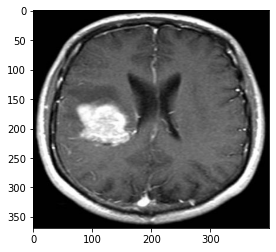

In [90]:
#testing the model "YES"


class_dict = {0: "no", 1: "yes"}

test_img1 = cv2.imread(r"C:\Users\Ranjith ch\Desktop\ML Main Project\brain_tumor_dataset\yes\Y11.jpg")

plt.imshow(test_img1)

test_img1.shape

dim = (224,224)

resized_image = cv2.resize(test_img1, dim, interpolation = cv2.INTER_AREA)
resized_image.shape
plt.grid(False)

test_img1 = np.expand_dims(resized_image, axis=0)

pred = model2.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)


no


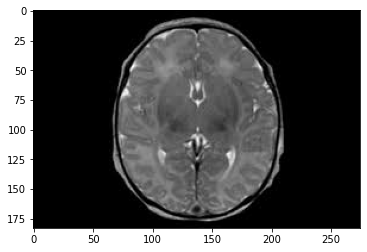

In [89]:
#testing the model "NO"


class_dict = {0: "no", 1: "yes"}
test_img1 = cv2.imread(r"C:\Users\Ranjith ch\Desktop\ML Main Project\brain_tumor_dataset\no\12 no.jpg")

plt.imshow(test_img1)

test_img1.shape

dim = (224,224)

resized_image = cv2.resize(test_img1, dim, interpolation = cv2.INTER_AREA)
resized_image.shape
plt.grid(False)

test_img1 = np.expand_dims(resized_image, axis=0)

pred = model1.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)
